In [1]:
from IPython.core.display import HTML
display(HTML("""
<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click here to toggle on/off the raw code.">
</form>"""))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from pathlib import Path
import pandas as pd

from sklearn.base import clone
from scipy.spatial.distance import euclidean, cityblock
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.graph_objects as go
import plotly.express as px
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)
from utils import *

# <div style="text-align:center"><span style="color:black; font-family:Helvetica">LAB FOUR</span></div>
### <center><i>A review of family-related issues decided by the Supreme Court of the Phlippines</i></center>

<!-- <img src="amazon.png" width="300" /> -->

## <span style="color:black; font-family:Helvetica">1.0.  Executive Summary/Synopsis</span>

## <span style="color:black; font-family:Helvetica">2.0. Background, Problem Statement, and Motivation </span>

### 2.1. Background and motivation

*from script:* \
Problem statement:
Thus, we wanted to answer the question, what are the general themes of the SC decisions on family relations? We wanted to know what kind of family-related issues go all the way to the Padre Faura.

Value of our Study:
Our team, through this study, hopes to help more Filipinos become more aware of what it means to be a


## <span style="color:black; font-family:Helvetica">3.0. Data Source and Description </span>

## <span style="color:black; font-family:Helvetica">4.0. Methodolody </span>

In the conduct of this exploratory data analysis, the following general steps were performed by the authors:
1. Data extraction, checking of values, and preprocessing
2. Dimensionality reduction (Term Frequency-Inverse Document Frequency [TF-IDF], and Latent Semantic Analysis)
3. Exploratory data analysis and visualization

###  4.1. Data extraction, checking of values, and preprocessing
#### <u> Data Scraping</u>
* The authors obtained the Supreme Court decisions by scraping https://elibrary.judiciary.gov.ph/ using requests. All decisions from 1996 to 2021 were downloaded and saved to local machines. An AWS cloud MySql database instance was established and used as a reference to monitor downloaded web pages. This setup enabled the the authors to download the cases faster as multiple users were able download different cases at the same time without overlap.


#### <u> Filtering</u>
* 

#### Part 1. Extracting Data, Cleaning the DataFrame

Extract cases that contain the following phrases: <br>`Family Code`, `inter-country adoption` and `domestic adoption`

#### Part 2. EDA

Read pickle file from pre-processed DataFrame

In [3]:
# df_labor = pd.read_pickle('df_labor_new.pkl')


# This is only for machines with Python version < 3.8
# The pickle file is exported using pickle5 protocol which comes with 3.8
# If python version is 3.8, use pd.read_pickle
# !pip install pickle5
import pickle5 as pickle
with open('df_labor_new.pkl', "rb") as fh:
    df_labor = pickle.load(fh)
    
display(df_labor.head())

date_yyyymmdd           division              case no  \
0    1996-08-22  THIRD\n\nDIVISION  g.r. nos. 102472-84   
1    1996-08-09    SECOND DIVISION      g.r. no. 107277   
2    1996-07-12     FIRST DIVISION      g.r. no. 116128   
3    1996-07-11     FIRST DIVISION       g.r. no. 74495   
4    1996-03-13     FIRST DIVISION      g.r. no. 101699   

                                          case title  \
0  juan saballa, lailani j. miranda, nelia i. iba...   
1  apolinario r. dacanay, benjamin f. tamayo, jos...   
2  allied banking corporation, petitioner, vs. na...   
3  dumez company and trans-orient engineers, inc....   
4  benjamin a. santos, petitioner, vs. national l...   

                                          petitioner  \
0  juan saballa, lailani j. miranda, nelia i. iba...   
1  apolinario r. dacanay, benjamin f. tamayo, jos...   
2                                               None   
3  dumez company and trans-orient engineers, inc....   
4                    benjamin a. santos, petitioner,   

                                          respondent               ponente  \
0  national labor relations commission and camari...        panganiban, j.   
1  national labor relations commission, ruben res...           mendoza, j.   
2                                               None  hermosisima, jr., j.   
3  national labor relations commission and veroni...  hermosisima, jr., j.   
4  national labor relations commission, hon. labo...             vitug, j.   

                                                body  \
0  \n in the instant case, the court reiterates t...   
1  \n this is a petition for certiorari\xa0 to an...   
2  \n for review in these consolidated petitions ...   
3  \n before us is a petition for certiorari\xa0 ...   
4  \n in a petition for\n \n certiorari\n \n unde...   

                                 dispositive portion  \
0  wherefore,\n    \n    the petition is hereby\n...   
1  wherefore,\n    \n    the petition is\n    \n ...   
2  wherefore,\n    \n    the\n    \n    nlrc\n   ...   
3  wherefore,\n    \n    the petition for certior...   
4  wherefore,\n    \n    the instant petition for...   

                                         disposition granted denied dismissed  \
0         [granted, reversed, set aside, reinstated]    True  False     False   
1                                        [dismissed]   False  False      True   
2  [affirmed, dismissed, reinstated, remanded, di...   False   True     False   
3                               [granted, set aside]    True  False     False   
4                    [affirmed, modified, set aside]   False   True     False   

  remanded_referred other justices law  \
0             False                 {}   
1             False                 {}   
2             False                 {}   
3             False                 {}   
4             False                 {}   

                                           provision  \
0  {' article 281': 1, ' article 282': 1, ' secti...   
1                                {' article 217': 1}   
2  {' article 263': 5, ' art. 263': 3, ' article ...   
3  {' section 1': 1, ' section 6': 1, ' article 4...   
4  {' article 282': 1, ' section 2': 1, ' section...   

                                            footnote  \
0      \n\n\n\n    narvasa, c.j. (chairman), davi...   
1      \n\n\n\n    regalado (chairman), romero, p...   
2      \n\n\n\n    padilla (chairman), bellosillo...   
3      \n\n\n\n    padilla (chairman), bellosillo...   
4      \n\n\n\n    padilla (chairman), bellosillo...   

                                                 url  
0  https://elibrary.judiciary.gov.ph/thebookshelf...  
1  https://elibrary.judiciary.gov.ph/thebookshelf...  
2  https://elibrary.judiciary.gov.ph/thebookshelf...  
3  https://elibrary.judiciary.gov.ph/thebookshelf...  
4  https://elibrary.judiciary.gov.ph/thebookshelf...

In [4]:
figure1(df_labor)

<center><b>Figure 1.</b> Count of Supreme Court decision on Labor related cases per year</center>


In [5]:
figure2(df_labor)

<center><b>Figure 2.</b> Figure 2. Supreme Court Division distribution on Labor related cases per year  </center>


In [32]:
df = df_fam.provision.apply(pd.Series).count(axis=0).to_frame().reset_index()
df.rename(columns={"index": 'article', 0: 'Count'}, inplace=True)

f = lambda x: x.replace('art.', 'article').replace('sec.', 'section')
df['article'] = df['article'].apply(f)
dfplot = df.groupby('article').sum().sort_values(by='Count', ascending=False)

articles = (dfplot.iloc[:20, ].reset_index().rename(columns={
    'index': 'article',
    'Count': 'count'
}))
bar_colors = '#5F9EA0'
fig = px.bar(articles.sort_values(by='count', ascending=True),
             x='count',
             y='article',
             color_discrete_sequence=[bar_colors])

fig.update_xaxes(title_text=None)
fig.update_yaxes(title_text=None)
fig.update_layout(title={
    'text': ('Top 20 Mentioned Articles and Sections'),
    'y': 0.95,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'
},
                  showlegend=False)
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)'
})

fig.show()

<center><b>Figure 4.</b> Philippine Constitution articles and sections cited on Supreme Court decision on familay related cases  </center>

### Cleaning the merged DataFrame

## Part 2. Dimensionality reduction

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering

from wordcloud import WordCloud
import re

en_stopwords = ['br', 'the', 'i', 'my', 'we', 'our', 'ours', 'ourselves',
                'you', "you're", "you've", "you'll", "you'd", 'your', 'yours',
                'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she',
                "she's", 'her', 'hers', 'herself', 'it', "it's", 'its',
                'itself', 'they', 'them', 'their', 'theirs', 'themselves',
                'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
                'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be'
                'been', 'being', 'have', 'has', 'had', 'having', 'did',
                'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because',
                'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'to',
                'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
                'all', 'any', 's', 't', 'can', 'will', 'just', 'don', "don't",
                'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've',
                'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
                "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
                "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
                "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan',
                "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren',
                "weren't", 'won', "won't", 'wouldn', "wouldn't", "do", "does",
                'in', 'on', 'for', 'of',
                'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'sept',
                'oct', 'nov', 'dec', 'january', 'february', 'march', 'april', 'june', 'july',
                'august', 'september', 'october', 'november', 'december',
                'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday',
                'clock']

ph_legal_stop_words =  ['private respondent', 'respondent', 'respondents',
                        'plaintiff', 'appellant', 'appellee', 'petitioner',
                        'accused', 'accused appellant', 'private complainant',
                        'rollo', 'id', 'x', 'xx', 'supra',  'j.', 'phil.', 'no.',
                        'tsn', 'transcript of stenographic notes', 'g.r.',
                        'republic v', 'republic vs', 'people', 'v.', ' v ',
                        'vs', 'civil case', 'case', 'ca', "cv", 'gr', 
                        'motion', 'dismiss', 'decision', 'resolution',
                        'order', 'so ordered', 'ordered', 'judgment', 
                        'notice', 'appeal', 'appealed', 'from', 
                        'judicial', 'proceeding', 'guilty', 'doubt', 'resonable'
                        'trial court', 'court appeals', 'appeals', 'rtc',
                        'regional', 'supreme', 'court', 'article', 'art',
                        'family code', 'rule', 'rules', 'revised penal code',
                        'penal code', 'revised', 'shall', 'via', 'law',
                        'dated','only', 'under', 'whether', 'et al', 'et', 'al']

def dual_wordcloud(wc, title):
    """Display 2 wordclouds side by side.
    
    Parameters
    ----------
    wc : list
        2 wordcloud.WordCould objects
    title : list
        WordCloud titles
    """
    fig, ax = plt.subplots(figsize=(15, 15), facecolor=None)
    ax1 = plt.subplot(121)
    ax1.set_title(title[0])
    ax1.imshow(wc[0])
    ax1.axis("off")

    ax2 = plt.subplot(122)
    ax2.set_title(title[1])
    ax2.imshow(wc[1])
    ax2.axis("off")
    # fig.suptitle(title)
    plt.show()


class Lab3:
    """"Class used for lab3 notebook."""

    def __init__(self, df, category=[], stop_words=[]):
        """Initialize Lab3 class.

        Parameters
        ----------
        df : Series

        category : list
            list of strings of categories to use.

        stop_words : list
            list of strings of additional stop_words
        """
        self.stopwords = set(en_stopwords + ph_legal_stop_words + stop_words)
        self.df = df
        self.tfidf_vectorizer, self.bow_ng = self.tfidf_wordcloud(df)

    def display_ve(self):
        """Display variance explained by running svd_plot_varex."""
        q_ng, s_ng, self.p_ng, nssd_ng, self.idx_90 = self.svd_plot_varex(self.bow_ng)

    def display_lsa(self):
        """Display LSA charts by running plot_lsa."""
        self.plot_lsa(self.tfidf_vectorizer, self.p_ng)

    def get_wordcloud(self):
        """

        Returns
        -------
        wordcloud
            worldcloud.Wordcloud object of phrases from amazon reviews.
        """
        idf_score = self.tfidf_vectorizer.idf_
        feature_names = self.tfidf_vectorizer.get_feature_names()
        # reverse score to give more weight on more common words
        idf_score_corrected = (max(idf_score) + 1 - idf_score) * 2
        idfscore_feat_d = dict(zip(feature_names, idf_score_corrected))

        wordcloud = WordCloud(width=800, height=800,
                              background_color='white',
                              min_font_size=10)\
            .generate_from_frequencies(idfscore_feat_d)
        return wordcloud

    def truncated_svd(self, X):
        """Return q, sigma, p and NSSD from the origin.

        Parameters
        ----------
        X : np.ndarray
            Input matrix

        Returns
        -------
        q, s, p.T, nssd 
            np.ndarray    
        """
        q, e, p = np.linalg.svd(X)
        e = e.astype(float)
        s = np.diag(e)
        nssd = e**2 / np.sum(e**2)
        return q, s, p.T, nssd

    def decontracted(self, phrase):
        """Remove word contractions from input phrases.

        Parameters
        ----------
        phrase : string

        Returns
        -------
        string
            decontracted phrase
        """
        phrase = re.sub(r"(?i)won't", "will not", phrase)
        phrase = re.sub(r"(?i)can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"(?i)n ?\'t", " not", phrase)
        phrase = re.sub(r"(?i)\'re", " are", phrase)
        phrase = re.sub(r"(?i)\'s", " is", phrase)
        phrase = re.sub(r"(?i)\'d", " would", phrase)
        phrase = re.sub(r"(?i)\'ll", " will", phrase)
        phrase = re.sub(r"(?i)\'t", " not", phrase)
        phrase = re.sub(r"(?i)\'ve", " have", phrase)
        phrase = re.sub(r"(?i)\'m", " am", phrase)
        #     phrase = re.sub(r"not ", "not_", phrase)
        return phrase

    def project_svd(self, q, s, k):
        """Return project_svd of based on k."""
        return q[:, :k] @ s[:k, :k]

    def tfidf_wordcloud(self, df, ngram_up=3):
        """Create WorldCloud and return Tfid vectorized arrays.

        Parameters
        ----------
        df : DataFrame
        ngram_up : integer (optional)
        
        Returns
        -------
        TfidfVectorizer, fitted TfidfVectorizer

        """
        preprocessed_reviews = []
        for sentence in df.values:
            sentence = self.decontracted(sentence)
            sentence = re.sub("\S*\d\S*", "", sentence).strip()
#             sentence = re.sub('[^A-Za-z_]+', ' ', sentence)
            sentence = ' '.join(e.lower() for e in sentence.split()
                                if e.lower() not in self.stopwords)
            preprocessed_reviews.append(sentence.strip())

        data = preprocessed_reviews

        tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, ngram_up),
        #                                            token_pattern=r'[a-z-]+',
                                                   min_df=5,
        #                                               strip_accent='ascii'
                                           max_df=.8)
        bow_ng = tfidf_vectorizer.fit_transform(data)
        return tfidf_vectorizer, bow_ng

    def svd_plot_varex(self, bow_ng):
        """Plot variable explain and return truncated svd.

        Parameters
        ----------
        bow_ng : np.ndarray

        Returns
        -------
        truncated_svd
        """
        q_ng, s_ng, p_ng, nssd_ng = self.truncated_svd(bow_ng.toarray())
        fig, ax = plt.subplots()
        ax.plot(range(1, len(nssd_ng) + 1), nssd_ng, '-', label='individual')
        ax.set_xlim(0, len(nssd_ng) + 1)
        ax.set_xlabel('SV')
        ax.set_ylabel('variance explained')
        ax = ax.twinx()
        ax.plot(range(1, len(nssd_ng) + 1),
                nssd_ng.cumsum(), 'r-', label='cumulative')
        ve_cumsum = nssd_ng.cumsum()
        idx_90 = ve_cumsum[ve_cumsum < .9].shape[0]
        ax.axhline(0.9, ls='--', color='g')
        ax.axvline(idx_90, ls='--', color='g')
        ax.set_ylabel('cumulative variance explained')
        plt.title('Variance Explained per SV\n'
                  f'90% Threshold at SV {idx_90}')
        plt.show()
        return q_ng, s_ng, p_ng, nssd_ng, idx_90

    def plot_lsa(self, tfidf_vectorizer, p_ng):
        """Plot LSA from truncated svd.

        Parameters
        ----------
        tfidf_vectorizer : TfidfVectorizer
        n_ng : np.ndarray
        """
        feature_names = tfidf_vectorizer.get_feature_names()
        fig, ax = plt.subplots(5, 2, figsize=(15, 30))
        for i, sub_ax in enumerate(fig.axes):
            order = np.argsort(np.abs(p_ng[:, i]))[-10:]
            sub_ax.barh([feature_names[o] for o in order], p_ng[order, i])
            sub_ax.set_title(f'SV{i+1}')
        plt.subplots_adjust(wspace=0.5)
        plt.suptitle('LSA Dimensions')
        plt.show()

### Instantiating the class

In [127]:
df = main_df['body'].copy()
df = Lab3(df)

AttributeError: 'Lab3' object has no attribute 'shape'

### Dimensionality Reduction

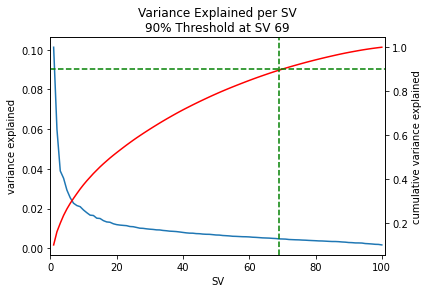

In [128]:
df.display_ve()

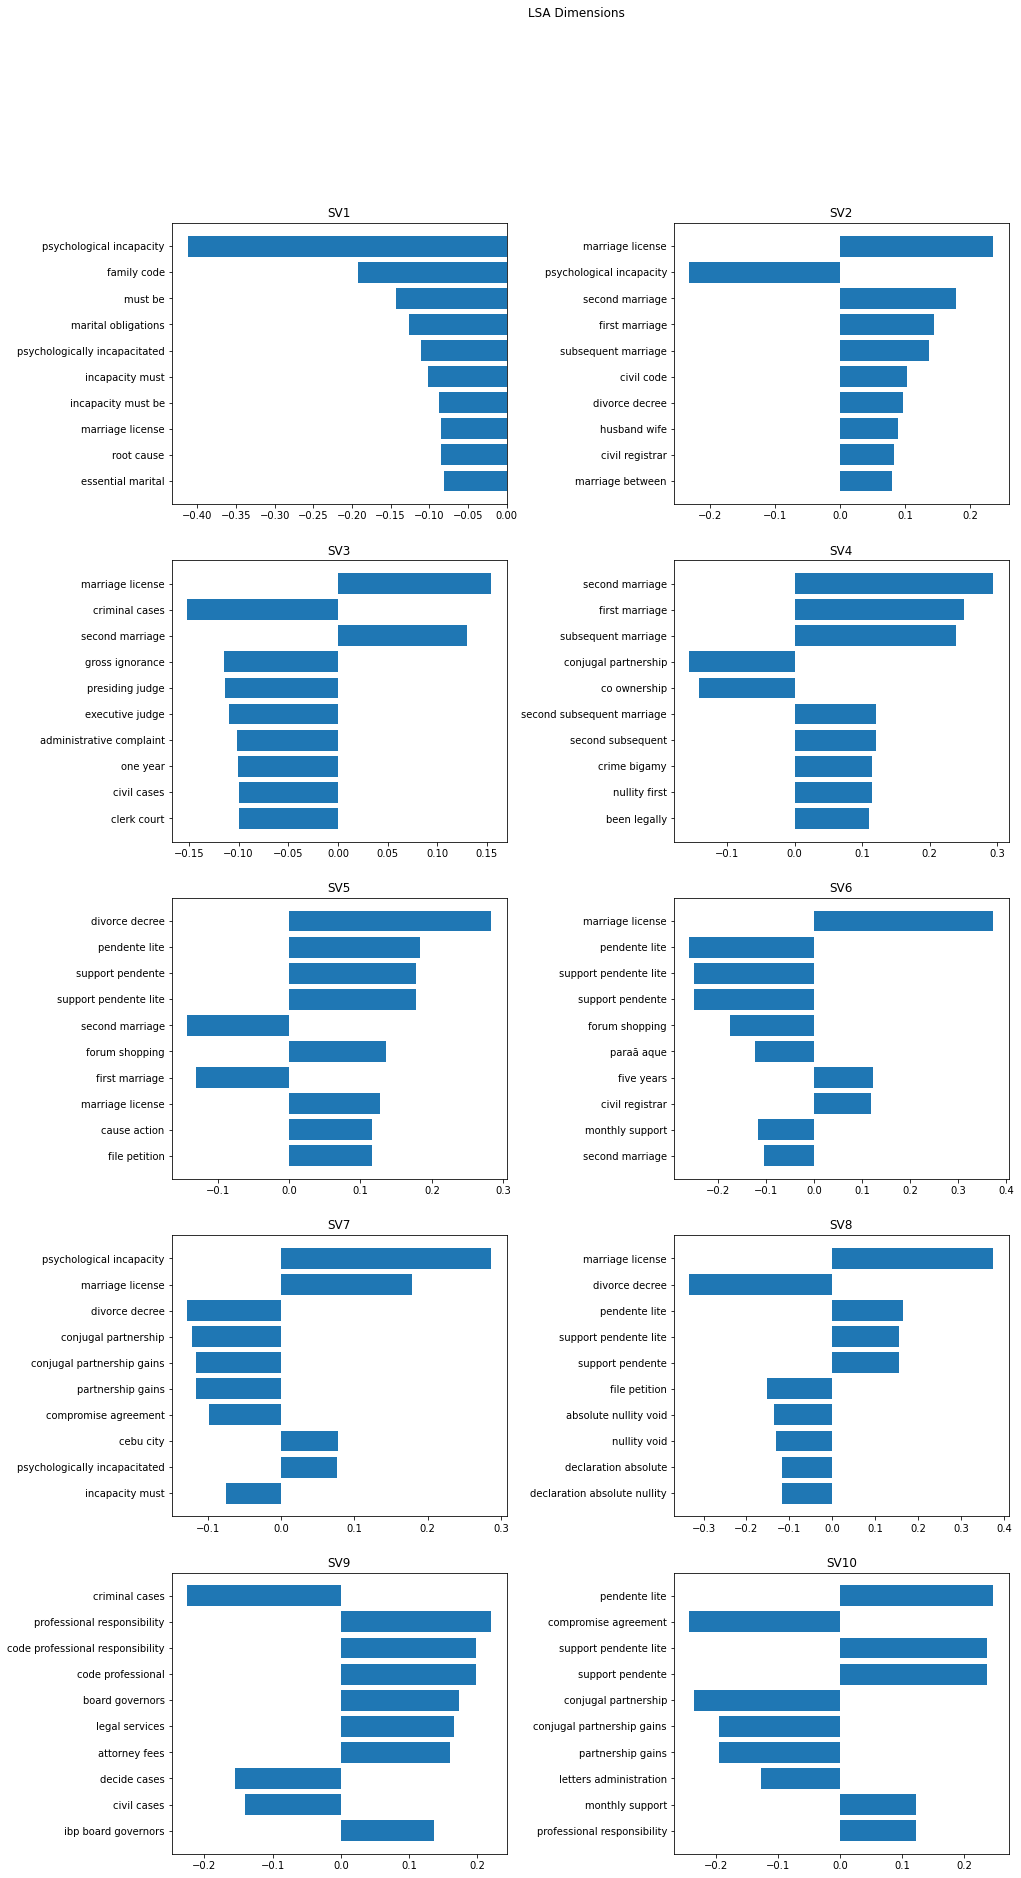

In [130]:
df.display_lsa()

## Clustering

In [134]:
X_ng_new = df.bow_ng.dot(df.p_ng[:,:df.idx_90])

In [135]:
mapped_df = main_df.copy()

map_ = {'FIRST DIVISION': 0,
        'SECOND DIVISION': 1,
        'THIRD DIVISION': 2,
        'EN BANC': 3,
        'SPECIAL FIRST DIVISION': 4,
        'SPECIAL THIRD DIVISION': 5}

# map_tf = {'False': 0,
#         'True': 1}
map_mf = {'M': 0,
        'F': 1,
        'none': 0}
mapped_df = mapped_df.replace({'division':map_})
# mapped_df = mapped_df.replace({'granted':map_tf})
# mapped_df = mapped_df.replace({'denied':map_tf})
# mapped_df = mapped_df.replace({'dismissed':map_tf})
mapped_df = mapped_df.replace({'sex':map_mf})

mapped_df.head()

date_yyyymmdd division                                            case no  \
0    2013-03-18        2  a.m. no. rtj-12-2335 [formerly oca i.p.i. no. ...   
1    2013-01-27        2                                    g.r. no. 183896   
2    2013-01-09        1                                    g.r. no. 170022   
3    2013-01-09        0                                    g.r. no. 185595   
4    2013-09-23        1                                    g.r. no. 202370   

                                          case title  \
0  anna liza valmores-salinas, complainant, vs. j...   
1  syed azhar abbas, petitioner, vs. gloria goo a...   
2  republic of the philippines, petitioner, vs. c...   
3  ma. carminia c. calderon represented by her at...   
4  juan sevilla salas, jr., petitioner, vs. eden ...   

                                          petitioner  \
0  judge crisologo s. bitas, regional trial court...   
1                      syed azhar abbas, petitioner,   
2           republic of the philippines, petitioner,   
3  ma. carminia c. calderon represented by her at...   
4               juan sevilla salas, jr., petitioner,   

                                          respondent             ponente  \
0           anna liza valmores-salinas, complainant,         peralta, j.   
1                      gloria goo abbas, respondent.     velasco jr., j.   
2                         cesar encelan, respondent.           brion, j.   
3  jose antonio f. roxas and court of appeals, re...  villarama, jr., j.   
4                   eden villena aguila, respondent.          carpio, j.   

                                                body  \
0  this resolves the verified complaint          ...   
1  this is a petition for review on certiorari un...   
2  we resolve the petition for review on         ...   
3  before us is a petition for review on certiora...   
4  the case               this petition for revie...   

                                 dispositive portion  \
0  wherefore,          premises considered, respo...   
1  wherefore          , in light of the foregoing...   
2  wherefore          , we          grant        ...   
3  wherefore          , the petition for review o...   
4  wherefore          , we          deny         ...   

                                  disposition granted denied dismissed  \
0                                          []    None   None      None   
1  [granted, reversed, set aside, reinstated]    True  False     False   
2             [granted, set aside, dismissed]    True  False     False   
3                          [denied, affirmed]   False   True     False   
4        [denied, affirmed, denied, affirmed]   False   True     False   

  remanded_referred other justices                 law  \
0              None                                 {}   
1             False                 {'family code': 8}   
2             False                 {'family code': 1}   
3             False          n      {'family code': 1}   
4             False                 {'family code': 4}   

                                           provision  \
0                    {' section 4': 2, ' sec. 3': 1}   
1  {' article 4': 3, ' article 9': 1, ' art. 3': ...   
2                                 {' article 36': 1}   
3                   {' art. 36': 1, ' section 1': 2}   
4  {' article 36': 2, ' article 147': 2, ' art. 1...   

                                            footnote  \
0  velasco, jr., (chairperson), abad, mendoza\n  ...   
1  peralta, abad, mendoza\n    \n    , and\n    \...   
2  carpio, (chairperson), del castillo, perez\n  ...   
3  .\n    \n\n\n    sereno c.j., (chairperson), l...   
4  [16]\n    \n    id. at 31-32.\n    \n\n\n     ...   

                                                 url  family_code_tag  \
0  https://elibrary.judiciary.gov.ph/thebookshelf...            False   
1  https://elibrary.judiciary.gov.ph/thebookshelf...            False   
2  https://elibrary.judiciary.gov.p

In [136]:
target_ng = mapped_df['granted'].tolist()

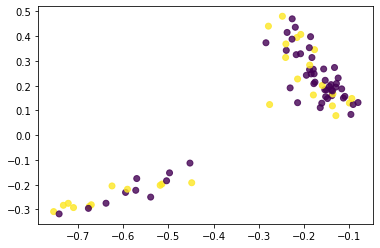

In [137]:
plt.scatter(X_ng_new[:,0], X_ng_new[:,1], c=target_ng, alpha=0.8);  

### Ward's method

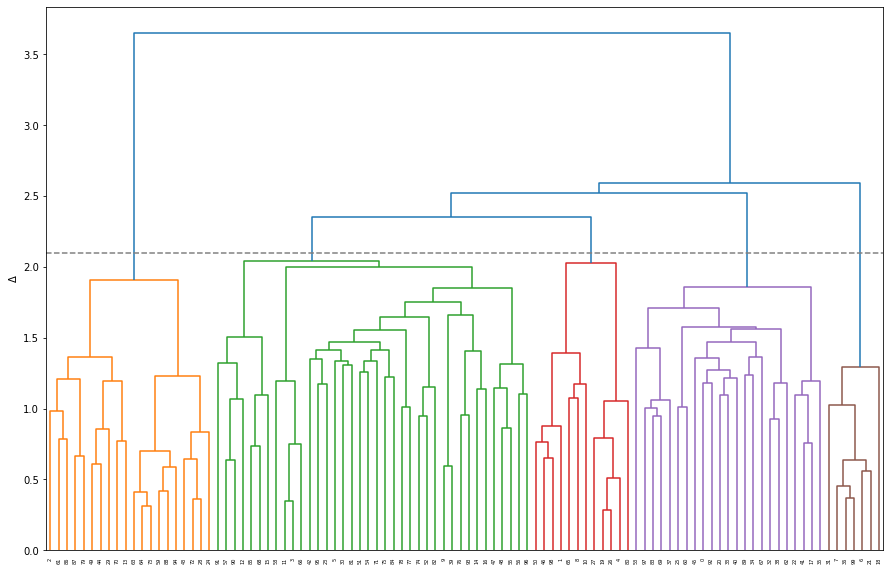

In [138]:
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch
best_t = 2.1
Z_wards = linkage(X_ng_new, method='ward', optimal_ordering=True)

def plot1(Z, best_t=0):
    """Return a truncated dendrogram plot."""
    fig, ax = plt.subplots(figsize=(15,10))
    dendrogram = sch.dendrogram(Z, truncate_mode='level',p=50
                               ,color_threshold = best_t)
    plt.ylabel(r'$\Delta$')
    if best_t >0:
        plt.axhline(best_t, linestyle='--', color='gray')
    plt.show()

plot1(Z_wards, best_t)

[1 2 3 4 5]


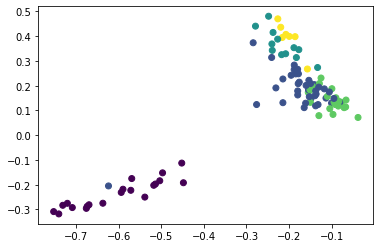

In [139]:
from scipy.cluster.hierarchy import fcluster
y_predict_ng_wards = fcluster(Z_wards, t=best_t, criterion='distance')
plt.scatter(X_ng_new[:,0], X_ng_new[:,1], c=y_predict_ng_wards);

print(np.unique(y_predict_ng_wards))

mapped_df_wards = pd.merge(mapped_df, pd.Series(y_predict_ng_wards, name='y_predict'), left_index=True, right_index=True)

In [140]:
mapped_df_wards = pd.merge(mapped_df, pd.Series(y_predict_ng_wards, name='y_predict'), left_index=True, right_index=True)

## Using Ward's

In [141]:
np.unique(mapped_df_wards['y_predict'])

array([1, 2, 3, 4, 5], dtype=int32)

#### First cluster

In [142]:
print(f"There are {len(mapped_df_wards[mapped_df_wards.y_predict==1])} cases in this cluster.")
display(mapped_df_wards[mapped_df_wards.y_predict==1].head())

There are 20 cases in this cluster.


date_yyyymmdd division          case no  \
2     2013-01-09        1  g.r. no. 170022   
13    2014-02-12        1  g.r. no. 171557   
24    2015-02-18        1  g.r. no. 192718   
28    2015-01-14        4  g.r. no. 166357   
29    2015-01-21        2  g.r. no. 208790   

                                           case title  \
2   republic of the philippines, petitioner, vs. c...   
13  republic of the philippines, petitioner, vs. r...   
24  robert f. mallilin, petitioner, vs. luz g. jam...   
28  valerio e. kalaw, petitioner, vs. ma. elena fe...   
29  glenn viñas, petitioner, vs. mary grace parel-...   

                                  petitioner  \
2   republic of the philippines, petitioner,   
13  republic of the philippines, petitioner,   
24           robert f. mallilin, petitioner,   
28             valerio e. kalaw, petitioner,   
29                  glenn viñas, petitioner,   

                                           respondent             ponente  \
2                          cesar encelan, respondent.           brion, j.   
13                  rodolfo o. de gracia, respondent.  perlas-bernabe, j.   
24  luz g. jamesolamin and the republic of the phi...         mendoza, j.   
28                   ma. elena fernandez, respondent.        bersamin, j.   
29                mary grace parel-viñas, respondent.           reyes, j.   

                                                 body  \
2   we resolve the petition for review on         ...   
13  assailed in this petition for review on       ...   
24  this is a petition for review on          cert...   
28  in our decision promulgated on september 19, 2...   
29  for review is the decision           [1]      ...   

                                  dispositive portion  \
2   wherefore          , we          grant        ...   
13  wherefore          , the petition is          ...   
24  wherefore          , the petition is          ...   
28  wherefore          , the court          grants...   
29  wherefore,          the instant petition is   ...   

                                   disposition granted denied dismissed  \
2              [granted, set aside, dismissed]    True  False     False   
13   [granted, reversed, set aside, dismissed]    True  False     False   
24                          [denied, affirmed]   False   True     False   
28  [granted, reversed, set aside, reinstated]    True  False     False   
29                          [denied, affirmed]   False   True     False   

   remanded_referred other justices                  law  \
2              False                  {'family code': 1}   
13             False                  {'family code': 9}   
24             False                 {'family code': 19}   
28             False                 {'family code': 30}   
29             False                  {'family code': 4}   

                                            provision  \
2                                  {' article 36': 1}   
13               {' article 36': 5, ' article 68': 2}   
24  {' article 48': 1, ' article 36': 14, ' art. 3...   
28  {' article 36': 21, ' article 68': 1, ' articl...   
29               {' article 68': 1, ' article 36': 2}   

                                             footnote  \
2   carpio, (chairperson), del castillo, perez\n  ...   
13  carpio, j., (chairperson), brion, del castillo...   
24  velasco, jr.,\n    \n     *\n    \n\n    and\n...   
28  leonardo-de castro, (chairperson),\n    \n    ...   
29  velasco, jr., (chairperson), peralta, bersamin...   

                                                  url  family_code_tag  \
2   https://elibrary.judiciary.gov.ph/thebookshelf...            False   
13  https://elibrary.judiciary.gov.ph/thebookshelf...            False   
24  https://elibrary.judiciary.gov.ph/thebookshelf...            False   
28  https://elibrary.judiciary.gov.ph/thebookshelf...            False   
29  https://elibrary.judiciary.gov.ph/thebookshelf...            False   

  

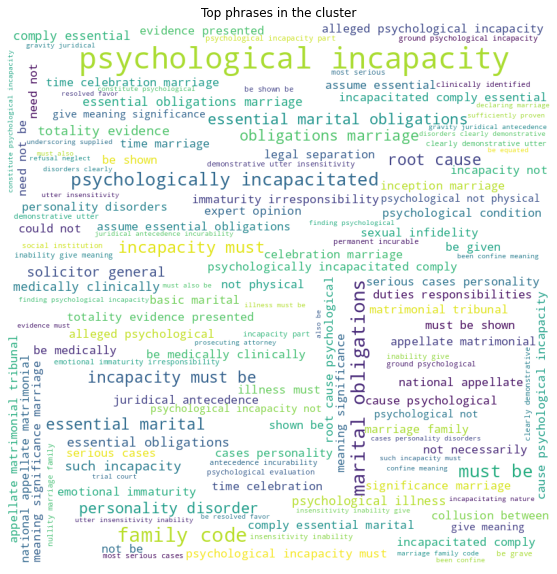

In [143]:
df_bow = pd.DataFrame(df.bow_ng.toarray(), columns = df.tfidf_vectorizer.get_feature_names())
c1_idx_w = mapped_df_wards[mapped_df_wards.y_predict==1].index.tolist()

c1_bow_w = df_bow.loc[c1_idx_w].sum(axis=0)
c1_bow_w = c1_bow_w[c1_bow_w>0]


c1_wordcloud_w = WordCloud(width=800, height=800,
                              background_color='white',
                              min_font_size=10)\
            .generate_from_frequencies(c1_bow_w)
c1_wordcloud_w


fig, ax = plt.subplots(figsize=(10, 10), facecolor=None)
# ax1 = plt.subplot(121)
ax.set_title('Top phrases in the cluster')
ax.imshow(c1_wordcloud_w)
ax.axis("off")

# fig.suptitle(title)
plt.show()

#### Second cluster

In [144]:
print(f"There are {len(mapped_df_wards[mapped_df_wards.y_predict==2])} cases in this cluster.")
display(mapped_df_wards[mapped_df_wards.y_predict==2].head())

There are 38 cases in this cluster.


date_yyyymmdd division              case no  \
3     2013-01-09        0      g.r. no. 185595   
5     2013-07-24        2      g.r. no. 179786   
9     2013-07-31        1      g.r. no. 189121   
11    2013-06-05        0  g.r. nos. 175279-80   
12    2013-06-26        1      g.r. no. 196049   

                                           case title  \
3   ma. carminia c. calderon represented by her at...   
5   josielene lara chan, petitioner, vs. johnny t....   
9   amelia garcia-quiazon, jenneth quiazon and mar...   
11  susan lim-lua, petitioner, vs. danilo y. lua, ...   
12  minoru fujiki, petitioner, vs. maria paz galel...   

                                           petitioner  \
3   ma. carminia c. calderon represented by her at...   
5                    josielene lara chan, petitioner,   
9   amelia garcia-quiazon, jenneth quiazon and mar...   
11                         susan lim-lua, petitioner,   
12                         minoru fujiki, petitioner,   

                                           respondent             ponente  \
3   jose antonio f. roxas and court of appeals, re...  villarama, jr., j.   
5                         johnny t. chan, respondent.            abad, j.   
9   ma. lourdes belen, for and in behalf of maria ...           perez, j.   
11                         danilo y. lua, respondent.  villarama, jr., j.   
12  maria paz galela marinay, shinichi maekara, lo...          carpio, j.   

                                                 body  \
3   before us is a petition for review on certiora...   
5   this case is about the propriety of issuing a ...   
9   this is a petition for review on          cert...   
11  in this petition for review on certiorari unde...   
12  the case               this is a direct recour...   

                                  dispositive portion  \
3   wherefore          , the petition for review o...   
5                                                   .   
9   wherefore          , premises considered, the ...   
11  wherefore,          the petition is          p...   
12  wherefore          , we          grant        ...   

                                          disposition granted denied  \
3                                  [denied, affirmed]   False   True   
5                                                  []    None   None   
9                                  [denied, affirmed]   False   True   
11  [granted, modified, dismissed, granted, set as...    True  False   
12         [granted, reversed, set aside, reinstated]    True  False   

   dismissed remanded_referred other justices                  law  \
3      False             False          n       {'family code': 1}   
5       None              None                                  {}   
9      False             False                  {'family code': 1}   
11     False             False                  {'family code': 3}   
12     False             False                 {'family code': 18}   

                                            provision  \
3                    {' art. 36': 1, ' section 1': 2}   
5   {' section 24': 3, ' sec. 24': 1, ' section 36...   
9   {' section 1': 3, ' sec. 1': 1, ' section 6': ...   
11  {' art. 203': 2, ' section 4': 1, ' article 19...   
12  {' sec. 2': 2, ' sec. 4': 2, ' section 5': 3, ...   

                                             footnote  \
3   .\n    \n\n\n    sereno c.j., (chairperson), l...   
5   velasco, jr., (chairperson), peralta,\n    \n ...   
9   carpio, (chairperson), brion, del castillo\n  ...   
11  sereno, c.j., (chairperson), leonardo-de castr...   
12  brion, del castillo, perez,\n    \n    and\n  ...   

                                                  url  family_code_tag  \
3   https://elibrary.judiciary.gov.ph/thebookshelf...            False   
5   https://elibrary.judiciary.gov.ph/thebookshelf...            False   
9   https://elibrary.judiciary.gov.ph/thebookshelf...            False   
11  https://elibrary.judiciary.

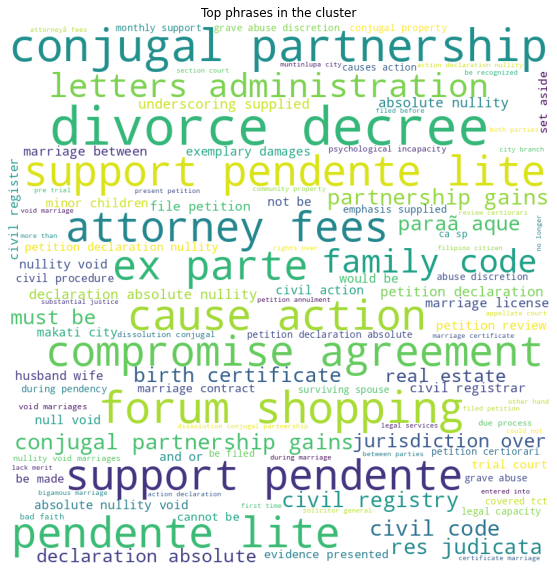

In [145]:
df_bow = pd.DataFrame(df.bow_ng.toarray(), columns = df.tfidf_vectorizer.get_feature_names())
c2_idx_w = mapped_df_wards[mapped_df_wards.y_predict==2].index.tolist()

c2_bow_w = df_bow.loc[c2_idx_w].sum(axis=0)
c2_bow_w = c2_bow_w[c2_bow_w>0]


c2_wordcloud_w = WordCloud(width=800, height=800,
                              background_color='white',
                              min_font_size=10)\
            .generate_from_frequencies(c2_bow_w)
c2_wordcloud_w


fig, ax = plt.subplots(figsize=(10, 10), facecolor=None)
# ax1 = plt.subplot(121)
ax.set_title('Top phrases in the cluster')
ax.imshow(c2_wordcloud_w)
ax.axis("off")

# fig.suptitle(title)
plt.show()

#### Third cluster

In [146]:
print(f"There are {len(mapped_df_wards[mapped_df_wards.y_predict==3])} cases in this cluster.")
display(mapped_df_wards[mapped_df_wards.y_predict==3].head())

There are 12 cases in this cluster.


date_yyyymmdd division          case no  \
1     2013-01-27        2  g.r. no. 183896   
4     2013-09-23        1  g.r. no. 202370   
8     2013-07-03        1  g.r. no. 201061   
10    2013-10-23        1  g.r. no. 202932   
19    2014-10-20        2  g.r. no. 176492   

                                           case title  \
1   syed azhar abbas, petitioner, vs. gloria goo a...   
4   juan sevilla salas, jr., petitioner, vs. eden ...   
8   sally go-bangayan, petitioner, vs.  benjamin b...   
10  edilberto u. ventura, jr., petitioner, vs. spo...   
19  marietta n. barrido, petitioner, vs. leonardo ...   

                                petitioner  \
1            syed azhar abbas, petitioner,   
4     juan sevilla salas, jr., petitioner,   
8           sally go-bangayan, petitioner,   
10  edilberto u. ventura, jr., petitioner,   
19        marietta n. barrido, petitioner,   

                                           respondent          ponente  \
1                       gloria goo abbas, respondent.  velasco jr., j.   
4                    eden villena aguila, respondent.       carpio, j.   
8                benjamin bangayan, jr.,  respondent.       carpio, j.   
10  spouses paulino and evangeline abuda, responde...       carpio, j.   
19                    leonardo v. nonato, respondent.      peralta, j.   

                                                 body  \
1   this is a petition for review on certiorari un...   
4   the case               this petition for revie...   
8   the case               before the court is a p...   
10  the case               this petition for revie...   
19  for the courtâ 80 99s resolution is a petition...   

                                  dispositive portion  \
1   wherefore          , in light of the foregoing...   
4   wherefore          , we          deny         ...   
8   wherefore          , we          affirm       ...   
10  wherefore          , the petition is          ...   
19  wherefore          , premises considered, the ...   

                                   disposition granted denied dismissed  \
1   [granted, reversed, set aside, reinstated]    True  False     False   
4         [denied, affirmed, denied, affirmed]   False   True     False   
8                                   [affirmed]   False   True     False   
10                          [denied, affirmed]   False   True     False   
19                          [denied, affirmed]   False   True     False   

   remanded_referred other justices                 law  \
1              False                 {'family code': 8}   
4              False                 {'family code': 4}   
8              False          n      {'family code': 6}   
10             False          n      {'family code': 4}   
19             False                 {'family code': 8}   

                                            provision  \
1   {' article 4': 3, ' article 9': 1, ' art. 3': ...   
4   {' article 36': 2, ' article 147': 2, ' art. 1...   
8   {' article 148': 5, ' section 21': 2, ' articl...   
10  {' article 83': 1, ' art. 83': 1, ' art. 144':...   
19  {' article 129': 5, ' article 51': 1, ' articl...   

                                             footnote  \
1   peralta, abad, mendoza\n    \n    , and\n    \...   
4   [16]\n    \n    id. at 31-32.\n    \n\n\n     ...   
8   .\n    \n\n\n    brion, bersamin,\n    \n\n   ...   
10  .\n    \n\n\n    velasco, jr.,. brion, reyes,\...   
19  villarama, jr., reyes, perlas-bernabe,\n    \n...   

                                                  url  family_code_tag  \
1   https://elibrary.judiciary.gov.ph/thebookshelf...            False   
4   https://elibrary.judiciary.gov.ph/thebookshelf...            False   
8   https://elibrary.judiciary.gov.ph/thebookshelf...            False   
10  https://elibrary.judiciary.gov.ph/thebookshelf...            False   
19  https://elibrary.judiciary.gov.ph/thebookshelf...            False   

    inter_adopt_tag  domestic_tag  yea

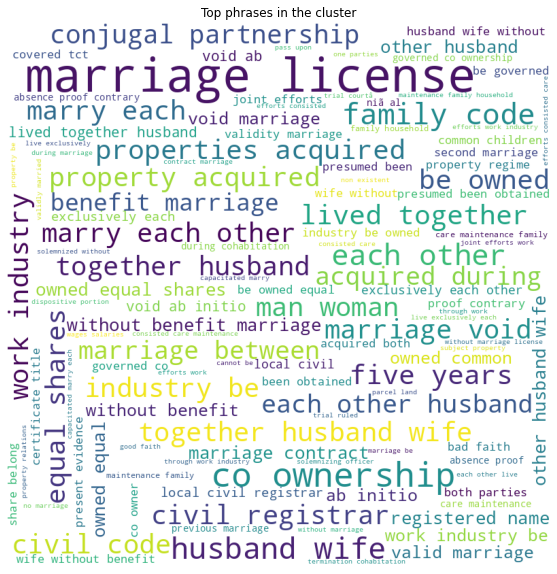

In [147]:
df_bow = pd.DataFrame(df.bow_ng.toarray(), columns = df.tfidf_vectorizer.get_feature_names())
c3_idx_w = mapped_df_wards[mapped_df_wards.y_predict==3].index.tolist()

c3_bow_w = df_bow.loc[c3_idx_w].sum(axis=0)
c3_bow_w = c3_bow_w[c3_bow_w>0]


c3_wordcloud_w = WordCloud(width=800, height=800,
                              background_color='white',
                              min_font_size=10)\
            .generate_from_frequencies(c3_bow_w)
c3_wordcloud_w


fig, ax = plt.subplots(figsize=(10, 10), facecolor=None)
# ax1 = plt.subplot(121)
ax.set_title('Top phrases in the cluster')
ax.imshow(c3_wordcloud_w)
ax.axis("off")

# fig.suptitle(title)
plt.show()

#### Fourth cluster

In [148]:
print(f"There are {len(mapped_df_wards[mapped_df_wards.y_predict==4])} cases in this cluster.")
display(mapped_df_wards[mapped_df_wards.y_predict==4].head())

There are 23 cases in this cluster.


date_yyyymmdd division                                            case no  \
0     2013-03-18        2  a.m. no. rtj-12-2335 [formerly oca i.p.i. no. ...   
17    2014-01-22        0      a.c. no. 8644 [formerly cbd case no. 11-2908]   
20    2014-11-10        2  a.m. no. p-13-3160 [formerly oca i.p.i. no. 11...   
22    2014-06-09        0                                     a.c. no. 10378   
25    2015-02-25        1                                    g.r. no. 206653   

                                           case title  \
0   anna liza valmores-salinas, complainant, vs. j...   
17  aida r. campos, alistair r. campos and charmai...   
20  lolita rayala velasco, complainant, vs. gerald...   
22  jose francisco t. baens, complainant, vs. atty...   
25  yuk ling ong, petitioner, vs. benjamin t. co, ...   

                                           petitioner  \
0   judge crisologo s. bitas, regional trial court...   
17                atty. eliseo m. campos, respondent.   
20  geraldo c. obispo, utility worker i, regional ...   
22              atty. jonathan t. sempio, respondent.   
25                          yuk ling ong, petitioner,   

                                           respondent      ponente  \
0            anna liza valmores-salinas, complainant,  peralta, j.   
17  aida r. campos, alistair r. campos and charmai...    reyes, j.   
20                lolita rayala velasco, complainant,    reyes, j.   
22              jose francisco t. baens, complainant,    reyes, j.   
25                        benjamin t. co, respondent.  mendoza, j.   

                                                 body  \
0   this resolves the verified complaint          ...   
17  before this court is a complaint for disbarmen...   
20  this administrative case concerns the liabilit...   
22  before this court is an administrative case, s...   
25  in court proceedings, there is no right more c...   

                                  dispositive portion  \
0   wherefore,          premises considered, respo...   
17  wherefore,          this court finds that resp...   
20  wherefore          , respondent geraldo c. obi...   
22                                                  .   
25  wherefore          , the petition is          ...   

                       disposition granted denied dismissed remanded_referred  \
0                               []    None   None      None              None   
17                              []    None   None      None              None   
20                              []    None   None      None              None   
22                              []    None   None      None              None   
25  [granted, reversed, set aside]    True  False     False             False   

   other justices                 law  \
0                                  {}   
17                                 {}   
20                                 {}   
22                                 {}   
25                 {'family code': 1}   

                                            provision  \
0                     {' section 4': 2, ' sec. 3': 1}   
17                                                 {}   
20  {' section 2': 3, ' section 22': 1, ' section ...   
22                                                 {}   
25  {' article 36': 1, ' section 2': 1, ' sec. 6':...   

                                             footnote  \
0   velasco, jr., (chairperson), abad, mendoza\n  ...   
17  sereno, c.j., (chairperson), bersamin, villara...   
20  velasco, jr., (chairperson), villarama, jr., p...   
22  sereno, c.j., (chairperson), leonardo-de castr...   
25  carpio, (chairperson), velasco, jr.,\n    \n\n...   

                                                  url  family_code_tag  \
0   https://elibrary.judiciary.gov.ph/thebookshelf...            False   
17  https://elibrary.judiciary.gov.ph/thebookshelf...            False   
20  https://elibrary.judiciary.gov.ph/thebookshelf...            False   
22  https://e

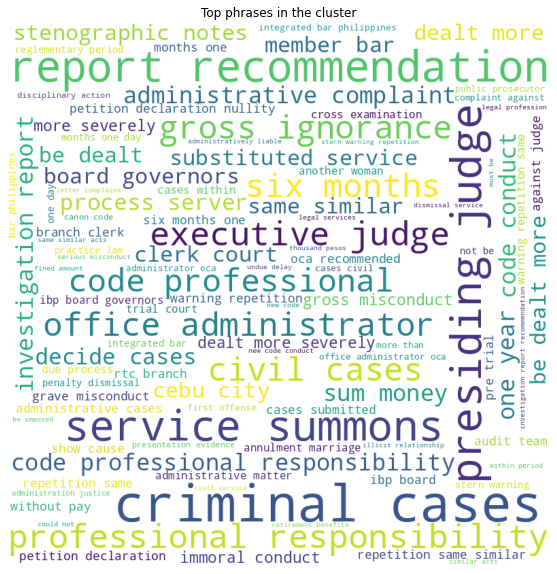

In [149]:
df_bow = pd.DataFrame(df.bow_ng.toarray(), columns = df.tfidf_vectorizer.get_feature_names())
c4_idx_w = mapped_df_wards[mapped_df_wards.y_predict==4].index.tolist()

c4_bow_w = df_bow.loc[c4_idx_w].sum(axis=0)
c4_bow_w = c4_bow_w[c4_bow_w>0]


c4_wordcloud_w = WordCloud(width=800, height=800,
                              background_color='white',
                              min_font_size=10)\
            .generate_from_frequencies(c4_bow_w)
c4_wordcloud_w


fig, ax = plt.subplots(figsize=(10, 10), facecolor=None)
# ax1 = plt.subplot(121)
ax.set_title('Top phrases in the cluster')
ax.imshow(c4_wordcloud_w)
ax.axis("off")

# fig.suptitle(title)
plt.show()

#### Fifth cluster

In [150]:
print(f"There are {len(mapped_df_wards[mapped_df_wards.y_predict==5])} cases in this cluster.")
display(mapped_df_wards[mapped_df_wards.y_predict==5].head())

There are 7 cases in this cluster.


date_yyyymmdd division                                            case no  \
6     2013-07-17        2                                    g.r. no. 191566   
7     2013-07-03        2                                    g.r. no. 183805   
18    2014-10-08        1                                    g.r. no. 187061   
21    2014-06-23        0                                    g.r. no. 159031   
31    2015-07-22        1  a.m. no. rtj-15-2417 [formerly known as oca ip...   

                                           case title  \
6   people of the philippines, petitioner, vs. edg...   
7   james walter p. capili, petitioner, vs. people...   
18  celerina j. santos, petitioner, vs. ricardo t....   
21  noel a. lasanas, petitioner, vs. people of the...   
31  eladio d. perfecto, complainant, vs. judge alm...   

                                     petitioner  \
6        people of the philippines, petitioner,   
7           james walter p. capili, petitioner,   
18              celerina j. santos, petitioner,   
21                 noel a. lasanas, petitioner,   
31  judge alma consuelo d. esidera, respondent.   

                                           respondent       ponente  \
6                     edgardo v. odtuhan, respondent.   peralta, j.   
7   people of the philippines and shirley tismo-ca...   peralta, j.   
18                     ricardo t. santos, respondent.    leonen, j.   
21             people of the philippines, respondent.  bersamin, j.   
31                   eladio d. perfecto, complainant,    leonen, j.   

                                                 body  \
6   this is a petition for review on          cert...   
7   before us is a petition for review on         ...   
18  the proper remedy for a judicial declaration o...   
21  any person who contracts a second marriage wit...   
31  on july 15, 2010, eladio perfecto filed an adm...   

                                  dispositive portion  \
6   wherefore,          the petition is hereby    ...   
7   wherefore          , premises considered, the ...   
18  wherefore          , the case is          rema...   
21  wherefore          , the court          affirm...   
31  wherefore,          we find respondent judge a...   

                       disposition granted denied dismissed remanded_referred  \
6   [granted, set aside, remanded]    True  False     False             False   
7               [denied, affirmed]   False   True     False             False   
18                      [remanded]   False  False      True             False   
21                      [affirmed]   False   True     False             False   
31                              []    None   None      None              None   

   other justices                  law  \
6                   {'family code': 1}   
7                   {'family code': 1}   
18                 {'family code': 12}   
21                  {'family code': 8}   
31                  {'family code': 2}   

                                            provision  \
6                                 {' article 349': 1}   
7   {' section 14': 1, ' article 3': 1, ' article ...   
18  {' article 42': 7, ' article 35': 1, ' article...   
21  {' article 349': 5, ' article 203': 1, ' art. ...   
31  {' section 1': 1, ' art. 66': 1, ' article 66'...   

                                             footnote  \
6   velasco, jr., (chairperson), abad, mendoza,\n ...   
7   velasco, jr., (chairperson), abad, mendoza\n  ...   
18  carpio, (chairperson), del castillo,â a0 mendo...   
21  sereno, c.j., leonardo-de castro, villarama, j...   
31  carpio, (chairperson), brion, del castillo\n  ...   

                                                  url  family_code_tag  \
6   https://elibrary.judiciary.gov.ph/thebookshelf...            False   
7   https://elibrary.judiciary.gov.ph/thebookshelf...            False   
18  https://elibrary.judiciary.gov.ph/thebookshelf...            False   
21  https://elibrary.judiciary.gov.ph

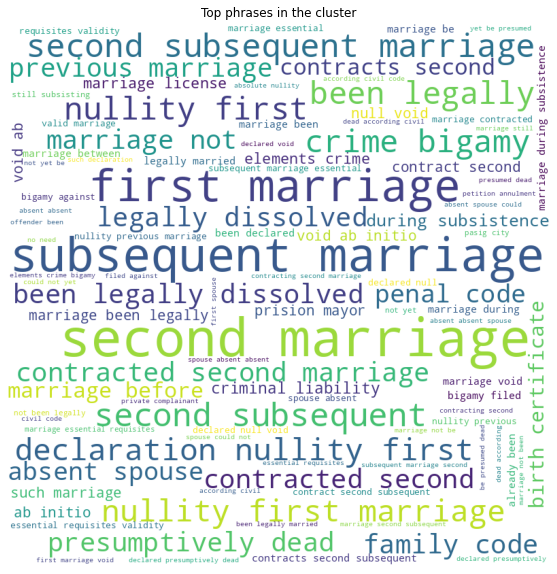

In [151]:
df_bow = pd.DataFrame(df.bow_ng.toarray(), columns = df.tfidf_vectorizer.get_feature_names())
c5_idx_w = mapped_df_wards[mapped_df_wards.y_predict==5].index.tolist()

c5_bow_w = df_bow.loc[c5_idx_w].sum(axis=0)
c5_bow_w = c5_bow_w[c5_bow_w>0]


c5_wordcloud_w = WordCloud(width=800, height=800,
                              background_color='white',
                              min_font_size=10)\
            .generate_from_frequencies(c5_bow_w)
c5_wordcloud_w


fig, ax = plt.subplots(figsize=(10, 10), facecolor=None)
# ax1 = plt.subplot(121)
ax.set_title('Top phrases in the cluster')
ax.imshow(c5_wordcloud_w)
ax.axis("off")

# fig.suptitle(title)
plt.show()

#### Sixth cluster

In [152]:
print(f"There are {len(mapped_df_wards[mapped_df_wards.y_predict==6])} cases in this cluster.")
display(mapped_df_wards[mapped_df_wards.y_predict==6].head())

There are 0 cases in this cluster.


Empty DataFrame
Columns: [date_yyyymmdd, division, case no, case title, petitioner, respondent, ponente, body, dispositive portion, disposition, granted, denied, dismissed, remanded_referred, other justices, law, provision, footnote, url, family_code_tag, inter_adopt_tag, domestic_tag, year, y_predict]
Index: []

In [153]:
df_bow = pd.DataFrame(df.bow_ng.toarray(), columns = df.tfidf_vectorizer.get_feature_names())
c6_idx_w = mapped_df_wards[mapped_df_wards.y_predict==6].index.tolist()

c6_bow_w = df_bow.loc[c6_idx_w].sum(axis=0)
c6_bow_w = c6_bow_w[c6_bow_w>0]


c6_wordcloud_w = WordCloud(width=800, height=800,
                              background_color='white',
                              min_font_size=10)\
            .generate_from_frequencies(c6_bow_w)
c6_wordcloud_w


fig, ax = plt.subplots(figsize=(10, 10), facecolor=None)
# ax1 = plt.subplot(121)
ax.set_title('Top phrases in the cluster')
ax.imshow(c6_wordcloud_w)
ax.axis("off")

# fig.suptitle(title)
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

#### Seventh cluster

In [82]:
print(f"There are {len(mapped_df_wards[mapped_df_wards.y_predict==7])} cases in this cluster.")
display(mapped_df_wards[mapped_df_wards.y_predict==7].head())

There are 13 cases in this cluster.


date_yyyymmdd  division          case no  \
26     2003-10-23         2  g.r. no. 152716   
39     1996-07-31         0  g.r. no. 122749   
101    2000-08-22         3  g.r. no. 119064   
132    2005-12-16         2  g.r. no. 159521   
186    2011-01-19         1  g.r. no. 178044   

                                            case title  \
26   elna mercado-fehr, petitioner, vs. bruno fehr,...   
39   antonio a. s. valdes, petitioner, vs. regional...   
101  neng “kagui kadiguia” malang, petitioner, vs. ...   
132  francisco l. gonzales, petitioner, vs. erminda...   
186  alain m. diño , petitioner, vs. ma. caridad l....   

                    ponente  \
26                 puno, j.   
39                vitug, j.   
101       gonzaga-reyes, j.   
132  sandoval-gutierrez, j.   
186              carpio, j.   

                                                  body granted  \
26   \n this case arose from a petition for declara...    True   
39   \n the petition for review bewails, purely on ...   False   
101  \n presented for resolution in this special ci...    True   
132  \n this petition for review on\n \n certiorari...   False   
186  \n\n\n\n the case\n \n\n\n\n\n before the cour...   False   

               ponente_code           position                    full_name  \
26                 puno, j.  Associate Justice                 Reynato Puno   
39                vitug, j.  Associate Justice                Jose C. Vitug   
101       gonzaga-reyes, j.  Associate Justice     Minerva P. Gonzaga-Reyes   
132  sandoval-gutierrez, j.  Associate Justice  Angelina Sandoval-Gutierrez   
186              carpio, j.  Associate Justice               Antonio Carpio   

    incumbent  sex             appointed_by  \
26          0    0              Fidel Ramos   
39          0    0              Fidel Ramos   
101         0    1           Joseph Estrada   
132         0    1           Joseph Estrada   
186         0    0  Gloria Macapagal Arroyo   

                                         law_school law_school_loc  y_predict  
26     University of the Philippines College of Law   Metro Manila          7  
39                      Manuel L. Quezon University   Metro Manila          7  
101    University of the Philippines College of Law   Metro Manila          7  
132  University of Santo Tomas Faculty of Civil Law   Metro Manila          7  
186    University of the Philippines College of Law   Metro Manila          7

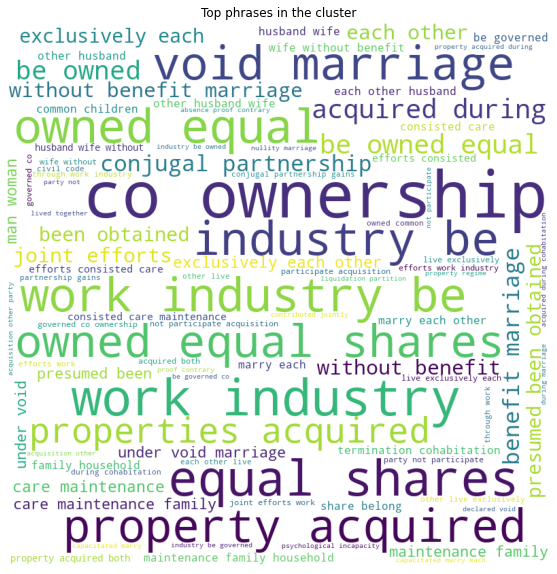

In [99]:
df_bow = pd.DataFrame(df.bow_ng.toarray(), columns = df.tfidf_vectorizer.get_feature_names())
c7_idx_w = mapped_df_wards[mapped_df_wards.y_predict==7].index.tolist()

c7_bow_w = df_bow.loc[c7_idx_w].sum(axis=0)
c7_bow_w = c7_bow_w[c7_bow_w>0]


c7_wordcloud_w = WordCloud(width=800, height=800,
                              background_color='white',
                              min_font_size=10)\
            .generate_from_frequencies(c7_bow_w)
c7_wordcloud_w


fig, ax = plt.subplots(figsize=(10, 10), facecolor=None)
# ax1 = plt.subplot(121)
ax.set_title('Top phrases in the cluster')
ax.imshow(c7_wordcloud_w)
ax.axis("off")

# fig.suptitle(title)
plt.show()

#### Eighth cluster

In [84]:
print(f"There are {len(mapped_df_wards[mapped_df_wards.y_predict==8])} cases in this cluster.")
display(mapped_df_wards[mapped_df_wards.y_predict==8].head())

There are 13 cases in this cluster.


date_yyyymmdd  division          case no  \
2      1997-08-11         2   g.r. no. 97898   
29     1999-03-09         0  g.r. no. 108532   
122    2008-11-27         2  g.r. no. 165060   
123    2009-03-20         2  g.r. no. 180587   
158    2005-11-25         1  g.r. no. 166333   

                                            case title              ponente  \
2    florante f. manacop, petitioner, vs. court of ...       panganiban, j.   
29   pablito taneo, jr., jose taneo, nena t. catubi...          kapunan, j.   
122  albino josef, petitioner, vs. otelio santos, r...  ynares-santiago, j.   
123  simeon cabang, virginia cabang and venancio ca...  ynares-santiago, j.   
158  jose e. honrado, petitioner, vs. court of appe...     callejo, sr., j.   

                                                  body granted  \
2    \n may a writ of execution of a final and exec...   False   
29   \n the issues in this case are not novel: whet...   False   
122  \n this petition for review on certiorari\n \n...    True   
123  \n this petition for review on certiorari unde...   False   
158  \n before this court is a petition for review ...    None   

            ponente_code           position                 full_name  \
2         panganiban, j.  Associate Justice        Artemio Panganiban   
29           kapunan, j.  Associate Justice       Santiago M. Kapunan   
122  ynares-santiago, j.  Associate Justice  Consuelo Ynares-Santiago   
123  ynares-santiago, j.  Associate Justice  Consuelo Ynares-Santiago   
158     callejo, sr., j.  Associate Justice     Romeo J. Callejo, Sr.   

    incumbent  sex             appointed_by  \
2           0    0              Fidel Ramos   
29          0    0              Fidel Ramos   
122         0    1           Joseph Estrada   
123         0    1           Joseph Estrada   
158         0    0  Gloria Macapagal Arroyo   

                                       law_school law_school_loc  y_predict  
2                          Far Eastern University   Metro Manila          8  
29   University of the Philippines College of Law   Metro Manila          8  
122  University of the Philippines College of Law   Metro Manila          8  
123  University of the Philippines College of Law   Metro Manila          8  
158                       San Beda College of Law   Metro Manila          8

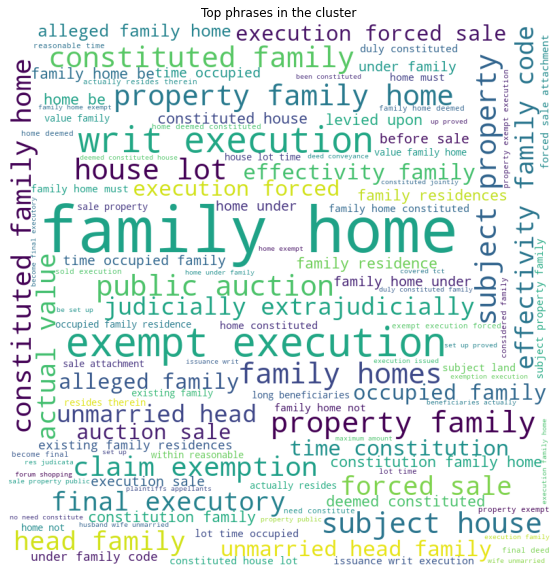

In [85]:
df_bow = pd.DataFrame(df.bow_ng.toarray(), columns = df.tfidf_vectorizer.get_feature_names())
c8_idx_w = mapped_df_wards[mapped_df_wards.y_predict==8].index.tolist()

c8_bow_w = df_bow.loc[c8_idx_w].sum(axis=0)
c8_bow_w = c8_bow_w[c8_bow_w>0]


c8_wordcloud_w = WordCloud(width=800, height=800,
                              background_color='white',
                              min_font_size=10)\
            .generate_from_frequencies(c8_bow_w)
c8_wordcloud_w


fig, ax = plt.subplots(figsize=(10, 10), facecolor=None)
# ax1 = plt.subplot(121)
ax.set_title('Top phrases in the cluster')
ax.imshow(c8_wordcloud_w)
ax.axis("off")

# fig.suptitle(title)
plt.show()

#### Ninth cluster

In [86]:
print(f"There are {len(mapped_df_wards[mapped_df_wards.y_predict==9])} cases in this cluster.")
display(mapped_df_wards[mapped_df_wards.y_predict==9].head())

There are 27 cases in this cluster.


date_yyyymmdd  division          case no  \
11     2000-08-01         2  g.r. no. 137110   
86     2000-11-27         1  g.r. no. 127406   
91     2004-02-06         1  g.r. no. 145226   
106    2000-07-31         0  g.r. no. 138509   
107    2000-03-14         0  g.r. no. 133778   

                                            case title              ponente  \
11   vincent paul g. mercado a.k.a. vincent g. merc...       panganiban, j.   
86   ofelia p. ty,petitioner, vs.the court of appea...       quisumbing, j.   
91   lucio morigo y cacho, petitioner, vs. people o...       quisumbing, j.   
106  imelda marbella-bobis, petitioner, vs. isagani...  ynares-santiago, j.   
107  engrace niñal for herself and as guardian ad l...  ynares-santiago, j.   

                                                  body granted  \
11   \n a judicial declaration of nullity of a prev...   False   
86   \n this appeal seeks the reversal of the decis...    True   
91   \n this petition for review on certiorari seek...    True   
106  \n on october 21, 1985, respondent contracted ...    True   
107  \n may the heirs of a deceased person file a p...    True   

            ponente_code           position                 full_name  \
11        panganiban, j.  Associate Justice        Artemio Panganiban   
86        quisumbing, j.  Associate Justice    Leonardo A. Quisumbing   
91        quisumbing, j.  Associate Justice    Leonardo A. Quisumbing   
106  ynares-santiago, j.  Associate Justice  Consuelo Ynares-Santiago   
107  ynares-santiago, j.  Associate Justice  Consuelo Ynares-Santiago   

    incumbent  sex    appointed_by  \
11          0    0     Fidel Ramos   
86          0    0     Fidel Ramos   
91          0    0     Fidel Ramos   
106         0    1  Joseph Estrada   
107         0    1  Joseph Estrada   

                                       law_school law_school_loc  y_predict  
11                         Far Eastern University   Metro Manila          9  
86   University of the Philippines College of Law   Metro Manila          9  
91   University of the Philippines College of Law   Metro Manila          9  
106  University of the Philippines College of Law   Metro Manila          9  
107  University of the Philippines College of Law   Metro Manila          9

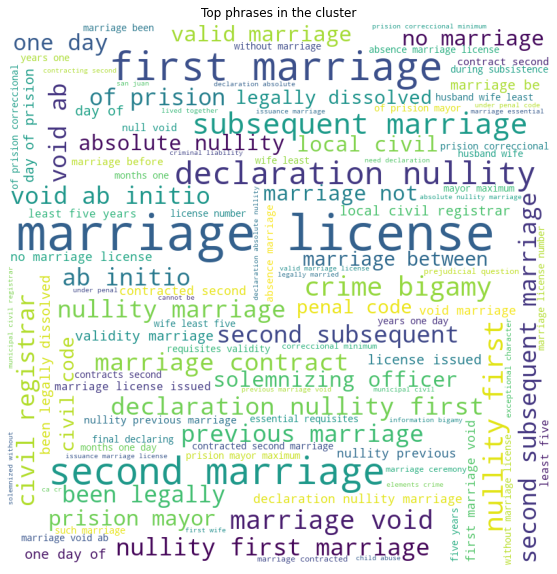

In [87]:
df_bow = pd.DataFrame(df.bow_ng.toarray(), columns = df.tfidf_vectorizer.get_feature_names())
c9_idx_w = mapped_df_wards[mapped_df_wards.y_predict==9].index.tolist()

c9_bow_w = df_bow.loc[c9_idx_w].sum(axis=0)
c9_bow_w = c9_bow_w[c9_bow_w>0]


c9_wordcloud_w = WordCloud(width=800, height=800,
                              background_color='white',
                              min_font_size=10)\
            .generate_from_frequencies(c9_bow_w)
c9_wordcloud_w


fig, ax = plt.subplots(figsize=(10, 10), facecolor=None)
# ax1 = plt.subplot(121)
ax.set_title('Top phrases in the cluster')
ax.imshow(c9_wordcloud_w)
ax.axis("off")

# fig.suptitle(title)
plt.show()

#### Tenth cluster

In [88]:
print(f"There are {len(mapped_df_wards[mapped_df_wards.y_predict==10])} cases in this cluster.")
display(mapped_df_wards[mapped_df_wards.y_predict==10].head())

There are 19 cases in this cluster.


date_yyyymmdd  division          case no  \
41     2000-04-06         2  g.r. no. 136467   
98     2009-07-31         1  g.r. no. 161062   
147    2015-07-29         1  g.r. no. 210929   
153    2005-12-09         1  g.r. no. 159614   
157    2005-11-29         1  g.r. no. 165842   

                                            case title           ponente  \
41   antonia armas y calisterio, petitioner, vs. ma...         vitug, j.   
98   republic of the philippines, petitioner, vs. f...    quisumbing, j.   
147  republic of the philippines, petitioner, vs. e...   mendoza, j., j.   
153  republic of the philippines, petitioner, vs. t...  callejo, sr., j.   
157  eduardo p. manuel, petitioner, vs. promulgated...  callejo, sr., j.   

                                                  body granted  \
41   \n on 24 april 1992, teodorico calisterio died...   False   
98   \n this is a petition for review on certiorari...   False   
147  \n in this petition for review on\n \n certior...    True   
153  \n on march 29, 2001, alan b. alegro filed a p...    None   
157  \n before us is a petition for review on\n \n ...    None   

         ponente_code           position               full_name incumbent  \
41          vitug, j.  Associate Justice           Jose C. Vitug         0   
98     quisumbing, j.  Associate Justice  Leonardo A. Quisumbing         0   
147   mendoza, j., j.  Associate Justice         Jose C. Mendoza         0   
153  callejo, sr., j.  Associate Justice   Romeo J. Callejo, Sr.         0   
157  callejo, sr., j.  Associate Justice   Romeo J. Callejo, Sr.         0   

     sex             appointed_by  \
41     0              Fidel Ramos   
98     0              Fidel Ramos   
147    0  Gloria Macapagal Arroyo   
153    0  Gloria Macapagal Arroyo   
157    0  Gloria Macapagal Arroyo   

                                       law_school law_school_loc  y_predict  
41                    Manuel L. Quezon University   Metro Manila         10  
98   University of the Philippines College of Law   Metro Manila         10  
147                       San Beda College of Law   Metro Manila         10  
153                       San Beda College of Law   Metro Manila         10  
157                       San Beda College of Law   Metro Manila         10

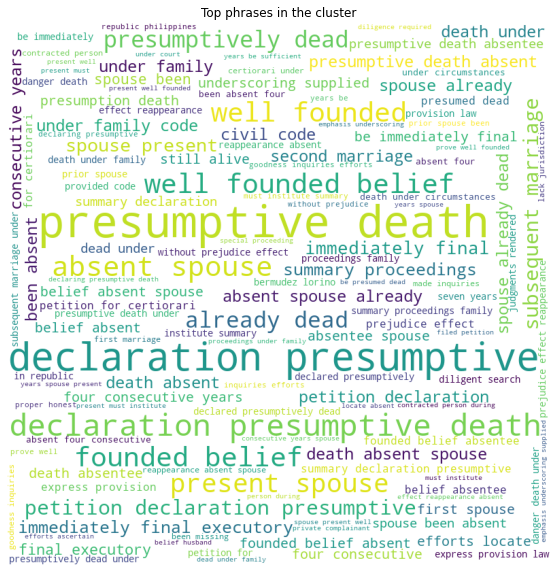

In [89]:
df_bow = pd.DataFrame(df.bow_ng.toarray(), columns = df.tfidf_vectorizer.get_feature_names())
c10_idx_w = mapped_df_wards[mapped_df_wards.y_predict==10].index.tolist()

c10_bow_w = df_bow.loc[c10_idx_w].sum(axis=0)
c10_bow_w = c10_bow_w[c10_bow_w>0]


c10_wordcloud_w = WordCloud(width=800, height=800,
                              background_color='white',
                              min_font_size=10)\
            .generate_from_frequencies(c10_bow_w)
c10_wordcloud_w


fig, ax = plt.subplots(figsize=(10, 10), facecolor=None)
# ax1 = plt.subplot(121)
ax.set_title('Top phrases in the cluster')
ax.imshow(c10_wordcloud_w)
ax.axis("off")

# fig.suptitle(title)
plt.show()